In [ ]:
#Take use input (PDF) and split it into Text, Graphs and images

In [12]:
!pip install "langchain>=0.0.331rc2" pillow pydantic lxml pillow matplotlib chromadb PyPDF2 pdfplumber pdf2image pytesseract pymupdf
!pip install -U langchain-community
%pip install sentence-transformers
%pip install -qU langchain-openai

In [13]:
import urllib.request

url = "https://sgp.fas.org/crs/misc/IF10244.pdf"
#url = "https://wutong16.github.io/publication/3_underreview_qr/visual_friendly_QR.pdf"
filename = "wildfire_stats.pdf"
#filename = "qr_tyle_transfer"
urllib.request.urlretrieve(url, filename)

('wildfire_stats.pdf', <http.client.HTTPMessage at 0x7ed7ab5c7910>)

In [14]:
path = "/content/"

In [15]:
import pdfplumber

def extract_text_from_pdf(pdf_file):
    with pdfplumber.open(pdf_file) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text()  # Extract text from each page
    return text

pdf_file = '/content/wildfire_stats.pdf'
text = extract_text_from_pdf(pdf_file)
print(text)


Updated June 1, 2023
Wildfire Statistics
Wildfires are unplanned fires, including lightning-caused Figure 1. Annual Wildfires and Acres Burned, 1993-2022
fires, unauthorized human-caused fires, and escaped fires
from prescribed burn projects. States are responsible for
responding to wildfires that begin on nonfederal (state,
local, and private) lands, except for lands protected by
federal agencies under cooperative agreements. The federal
government is responsible for responding to wildfires that
begin on federal lands. The Forest Service (FS)—within the
U.S. Department of Agriculture—carries out wildfire
management and response across the 193 million acres of
the National Forest System (NFS). The Department of the
Interior (DOI) manages wildfire response for more than 400
million acres of national parks, wildlife refuges and
preserves, other public lands, and Indian reservations. Source: NICC Wildland Fire Summary and Statistics annual reports.
Note: Data reflect wildland fires and ac

Extracted: image_page1_1.png
Extracted: image_page1_2.png
Extracted: image_page1_3.png
Extracted: image_page2_1.png
Extracted: image_page2_2.png


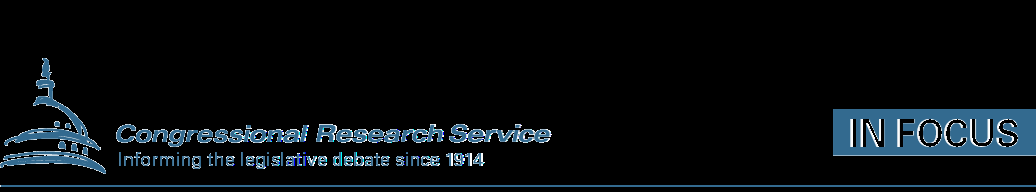

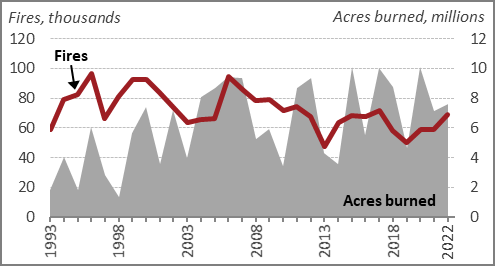

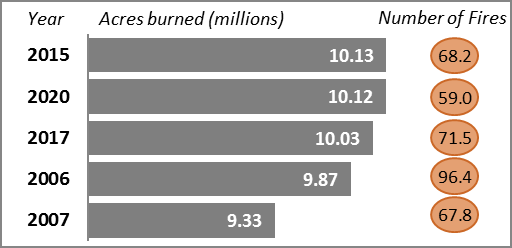

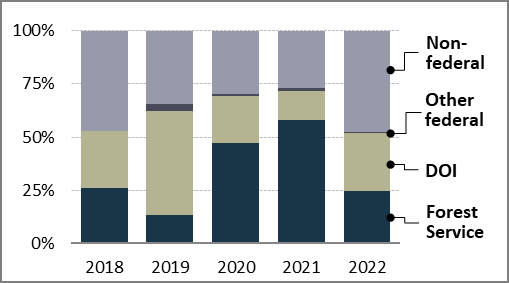

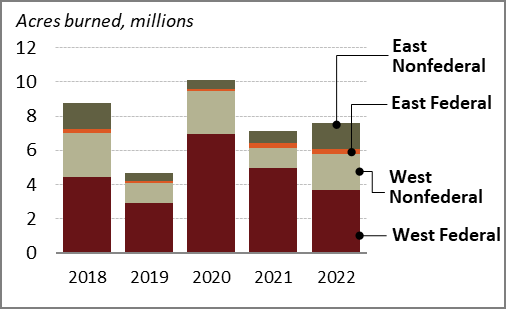

In [16]:
import fitz  # PyMuPDF
import os
from IPython.display import display, Image

def extract_images_from_pdf(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    images_list = []  # List to store image file paths

    # Loop through each page
    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)  # Load each page
        image_list = page.get_images(full=True)  # Extract images

        # Loop through all the images on the page
        for img_index, img in enumerate(image_list):
            xref = img[0]  # Image index reference
            base_image = pdf_document.extract_image(xref)  # Extract the image
            image_bytes = base_image["image"]  # Image data
            image_ext = base_image["ext"]  # Image file extension

            # Save the image to a temporary file
            image_filename = f"image_page{page_num + 1}_{img_index + 1}.{image_ext}"
            with open(image_filename, "wb") as image_file:
                image_file.write(image_bytes)

            images_list.append(image_filename)  # Add file path to the list

            print(f"Extracted: {image_filename}")

    return images_list  # Return the list of images

def display_images(image_list):
    for img in image_list:
        display(Image(filename=img))  # Display each image

# Usage example
pdf_path = "/content/wildfire_stats.pdf"
image_list = extract_images_from_pdf(pdf_path)
display_images(image_list)


In [17]:
import base64

def convert_images_to_base64(file_paths):
    base64_images = []

    for file_path in file_paths:
        with open(file_path, "rb") as image_file:
            # Read the image file and encode it to base64
            encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
            base64_images.append(encoded_string)

    return base64_images

# Convert the images and store them as base64
base64_images = convert_images_to_base64(image_list)
base64_images[0]

'iVBORw0KGgoAAAANSUhEUgAABAwAAADACAYAAACAhvGqAAAACXBIWXMAAA7EAAAOxAGVKw4bAAA5GUlEQVR4nO3di7MdVZn38fM3DfJa+g6DlOVY+iKvr+VYojPOvPOKw81LElCR26ggCgiIISQYIoYEhHANGSCSCyEmERIRgZAEnYEQEAPK/SpO7Xf/+pznnNXPXqsv++xzVp+dL1WfItm7L6tXd+/0enqtZ01MTEz0AAAAAAAAnOwFAAAAAAAA3ZO9AAAAAAAAoHuyFwAAAAAAAHRP9gIAAAAAAIDuyV4AAAAAAADQPdkLAAAAAAAAuid7AQAAAAAAQPdkLwAAAAAAAOie7AUAAAAAAADdk70AAAAAAACge7IXAAAAAAAAdE/2AgAAAAAAgO7JXgAAAAAAANA92QsAAAAAAAC6J3sBAAAAAABA92QvAAAAAAAA6J7sBQAAAAAAAN2TvQAAAAAAAKB7shcAAAAAAAB0T/YCAAAAAACA7sleAAAAAAAA0D3ZCwAAAAAAALonewEAAAAAAED3ZC8AAAAAAADonuwFAAAAAAAA3ZO9AAAAAAAAoHuyFwAAAAAAAHRP9gIAAAAAAIDuyV4AAAAAAADQPdkLAAAAAAAAuid7AQAAAAAAQPdkLwAAAAAAAOie7AUAAAAAAADdk70AAAAAAACge7IXAAAAAAAAdE/2AgAAAAAAgO7JXgAAAAAAANA92QsAAAAAAAC6J3sBAAAAAABA92QvAAAAAAAA6J7sBQAAAAAAAN2TvQAAAAAAAKB7shcAAAAAAAB0T/YCAAAAAACA7sleAAAAAAAA0D3ZCwAAAAAAALonewEAAAAAAED3ZC8AAAAAAADonuwFAAAAAAAA3ZO9AAAAAAAAoHuyFwAAAAAAAHRP9gIAAAAAAIDuyV4AAAAAAADQPdkLAAAAAAAAuid7AQAAAAAAQPdkLwAAAAAAAOie7AUAAAAAAADdk70AjTz3p1d7R516ee/EC9f

In [18]:
import google.generativeai as genai
import base64
 # Configure generative AI model
my_api_key = os.getenv("GEMINI_API_KEY")

genai.configure(api_key=gemini_api_key)
model = genai.GenerativeModel('gemini-1.5-flash')

prompt = "Describe the image in detail. Be specific about graphs, such as bar plots."
visual_descriptions = []
for img in image_list:

  with open(img, "rb") as image_file:
        image_data = image_file.read()  # Read image data as binary

  image_data_base64 = base64.b64encode(image_data).decode('utf-8')
  response = model.generate_content([prompt, image_data_base64])
  visual_descriptions.append(response.text)

In [19]:
visual_descriptions[1]

'The image depicts a complex network of interconnected nodes and edges, likely representing a system or a set of relationships. Let\'s break down its details:\n\n**Central Node:** \n- A large, circular node labeled "Go1Go" sits at the center of the image. This central node appears to be the focal point of the entire network. \n\n**Secondary Nodes:** \n- Numerous smaller, circular nodes surround the central node, each connected to it by a single line. These nodes are labeled with various terms and abbreviations like "Go2," "Go3," "Go4," "Go5," "Go6," "Go7," "Go8," "Go9," "Go10," and "Go11."  \n- There\'s also a node labeled "E2" connected to "Go1" and "Go4," highlighting a distinct connection.\n\n**Edge Connections:**\n- The lines connecting the nodes are referred to as "edges," representing relationships or interactions between the nodes. These edges are all straight lines, suggesting direct connections. \n\n**Clustered Nodes:**\n- There are smaller clusters of nodes branching off from

In [20]:
#We also need to split the text data into chunks

In [21]:
def split_string_into_chunks(long_text, max_chunk_size=3000):
    # Create a list to hold the chunks
    chunks = []

    # Iterate over the text, slicing it into chunks
    for start_index in range(0, len(long_text), max_chunk_size):
        end_index = start_index + max_chunk_size
        chunk = long_text[start_index:end_index]  # Extract the chunk
        chunks.append(chunk)  # Add the chunk to the list

    return chunks

# Example usage
long_string = text
text_chunks = split_string_into_chunks(long_string)

# Print the chunks with their indices
#for index, chunk in enumerate(chunks):
#    print(f"Chunk {index + 1}: {chunk}\n")

len(text_chunks)

4

In [22]:
#create text summaries using text chunks
text_summaries = []
query = " --> Summarize the text in a concise manner"
for text in text_chunks:
  result = model.generate_content(text+ query)
  text_summaries.append(result.text)

text_summaries

["This report provides data on wildfire statistics in the United States from 1993 to 2023.  It shows a slight decrease in the number of annual wildfires, but a significant increase in the acreage burned.  The report highlights the impact of wildfires in 2022, with 68,988 fires burning 7.6 million acres, over 40% of which were in Alaska.  The text also emphasizes the variability of wildfire activity and that acreage burned does not always reflect the severity of the fire's impact on communities and ecosystems. \n",
 'The text provides information about wildfire statistics in the United States. It states that most wildfires are human-caused, but those caused by lightning tend to burn more acreage. In 2022, 52% of the acreage burned was on federal lands, lower than the 10-year average. Alaska experienced the highest number of fires, mostly on nonfederal lands. The text also mentions that wildfire suppression resources are measured by the Preparedness Level (PL) scale, which reached level 

In [23]:
print(len(text_chunks[1]))
print(len(text_summaries[1]))

3000
656


#Store data in vector stores

In [24]:
#We got Text and visual descriptions. nwo we have to store them in vector stores

In [25]:
import os


In [26]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
#from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever
#from langchain.embeddings import OpenAIEmbeddings

from langchain.embeddings import SentenceTransformerEmbeddings

embedding_model = SentenceTransformerEmbeddings(model_name='all-MiniLM-L6-v2')

from langchain_openai import OpenAIEmbeddings



# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag",
                     embedding_function=embedding_model)

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
<ipython-input-26-058769798dfa>:11: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name='all-MiniLM-L6-v2')
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, c

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-26-058769798dfa>:18: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi_modal_rag",


In [27]:
text_summaries_id = [str(uuid.uuid4()) for _ in text_summaries]
visual_descriptions_id = [str(uuid.uuid4()) for _ in visual_descriptions]

In [28]:
text_summaries_docs = []
# Loop through each text summary and its corresponding document ID
for i in range(len(text_summaries)):
    summary = text_summaries[i]  # Get the current summary
    doc_id = text_summaries_id[i]  # Get the corresponding document ID

    # Create a Document object with the summary and document ID as metadata
    doc = Document(page_content=summary, metadata={id_key: doc_id})

    # Add the Document to the summary_texts list
    text_summaries_docs.append(doc)

visual_descriptions_docs = []
# Loop through each text summary and its corresponding document ID
for i in range(len(text_summaries)):
    summary = text_summaries[i]  # Get the current summary
    doc_id = text_summaries_id[i]  # Get the corresponding document ID

    # Create a Document object with the summary and document ID as metadata
    doc = Document(page_content=summary, metadata={id_key: doc_id})

    # Add the Document to the summary_texts list
    visual_descriptions_docs.append(doc)

In [29]:
retriever.vectorstore.add_documents(text_summaries_docs)
retriever.docstore.mset(list(zip(text_summaries_id, text_chunks)))

retriever.vectorstore.add_documents(visual_descriptions_docs)
retriever.docstore.mset(list(zip(visual_descriptions_id, base64_images)))

In [30]:
# Retrieve
docs = retriever.get_relevant_documents(
    "What is the change in wild fires from 1993 to 2022?"
)

<ipython-input-30-bdc9bf23b95c>:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(


In [31]:
len(docs)

2

In [32]:
print(docs)

['Updated June 1, 2023\nWildfire Statistics\nWildfires are unplanned fires, including lightning-caused Figure 1. Annual Wildfires and Acres Burned, 1993-2022\nfires, unauthorized human-caused fires, and escaped fires\nfrom prescribed burn projects. States are responsible for\nresponding to wildfires that begin on nonfederal (state,\nlocal, and private) lands, except for lands protected by\nfederal agencies under cooperative agreements. The federal\ngovernment is responsible for responding to wildfires that\nbegin on federal lands. The Forest Service (FS)—within the\nU.S. Department of Agriculture—carries out wildfire\nmanagement and response across the 193 million acres of\nthe National Forest System (NFS). The Department of the\nInterior (DOI) manages wildfire response for more than 400\nmillion acres of national parks, wildlife refuges and\npreserves, other public lands, and Indian reservations. Source: NICC Wildland Fire Summary and Statistics annual reports.\nNote: Data reflect wil

In [33]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI


In [34]:
from base64 import b64decode
def split_image_text_types(docs):
    ''' Split base64-encoded images and texts '''
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return b64, text


In [35]:
from typing import Any, Dict, Iterator, List, Optional
import requests
from langchain_core.callbacks.manager import CallbackManagerForLLMRun
from langchain_core.language_models.llms import LLM
from langchain_core.outputs import GenerationChunk

class GeminiLLM(LLM):
    """A custom wrapper for the Gemini model."""
    api_key: str
    model_name: str

    def _call(
        self,
        prompt: str,
        stop: Optional[List[str]] = None,
        run_manager: Optional[CallbackManagerForLLMRun] = None,
        **kwargs: Any,
    ) -> str:
        """Run the LLM on the given input."""

        genai.configure(api_key=self.api_key)
        model = genai.GenerativeModel(self.model_name)

        response = model.generate_content(prompt)
        return response.text  # Adjust based on actual response structure

    @property
    def _llm_type(self) -> str:
        return "gemini"

In [58]:
#model is the gemini multimodal model were using
prompt_template = PromptTemplate(
    input_variables=["query", "text", "images"],
    template="This is the query {query}, answer with only the context i will be providing whihc will be\
    texts and images. text : {text}, images: {images}?. if there are no images use the text only"
)


mdel = GeminiLLM(api_key = gemini_api_key, model_name = 'gemini-1.5-flash')
chain = LLMChain(llm=mdel, prompt=prompt_template)

query = "What is the change in wild fires from 2018 to 2022?"

docs = retriever.get_relevant_documents( query )
images, text = split_image_text_types(docs)



response = chain.run(query=query, text = " ".join(text), images= " ".join(images))
print(response)


## Wildfire Change from 2018 to 2022

The text provides data on wildfires in the US from 1993 to 2022.  Here's the information regarding changes in wildfires from 2018 to 2022:

**Number of Fires:**

* **Overall:** The number of fires has slightly increased from 2018 to 2022, going from 58.1 thousand to 69.0 thousand.
* **Federal:** The number of fires on federal lands has fluctuated but remained relatively consistent, ranging from 10.9 thousand to 14.4 thousand.
* **Nonfederal:** The number of fires on nonfederal lands has shown a more consistent increase, moving from 39.6 thousand in 2019 to 57.2 thousand in 2022. 

**Acres Burned:**

* **Overall:** The acreage burned has also increased, going from 8.8 million acres in 2018 to 7.6 million acres in 2022.
* **Federal:** The acreage burned on federal lands has fluctuated, with a high of 7.1 million acres in 2020 and a low of 3.1 million acres in 2019.
* **Nonfederal:** The acreage burned on nonfederal lands has shown a more consistent i

In [59]:
len(text)

2

In [60]:
len(images)

0

In [61]:
import base64
from io import BytesIO
import matplotlib.pyplot as plt
from PIL import Image

for img in images:
  image_data = base64.b64decode(img)
  # Open the image
  image = Image.open(BytesIO(image_data))

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('off')  # Turn off axis
  plt.show()

In [62]:
print(images)

[]


In [42]:
#Feedback Looooop


In [63]:
query = "i want you to evalute the following answer based on how accurate it\
 is with respect to the given context. If it is not, i want you to give me ways to improve it. Use what context you have  "

feedback_response = model.generate_content(query+response+"Context:  "+" ".join(text))

In [64]:
feedback_response.text

'The answer is mostly accurate but could be improved by addressing a few points:\n\n**Accuracy:**\n\n* **Overall Trend:** The answer accurately states that while the number of wildfires has slightly increased, the overall trend over the last 30 years shows a slight decrease in the number of fires and an increase in the acreage burned. This is supported by the context provided.\n* **Cause Breakdown:** The answer correctly identifies human-caused fires as the primary cause and highlights the tendency for lightning-caused fires to be larger and burn more acreage.\n\n**Areas for Improvement:**\n\n* **Inconsistency in Data:** The answer states that the acreage burned has increased from 8.8 million acres in 2018 to 7.6 million acres in 2022. However, Table 1 in the context shows a higher acreage burned in 2020 (10.1 million acres). This discrepancy should be clarified or addressed.\n* **Focus on 2018-2022:**  The answer focuses heavily on trends from 2018 to 2022. While this is relevant, it 

In [66]:
query = "I will give you the question, context,answer and how to make it better. make it better, nothing more  "
question = "What is the change in wild fires from 2018 to 2022?"

final_response = model.generate_content(query+
                                  "question "+ question +
                                  "context: "+ " ".join(text) +
                                  "answer: "+response+
                                  "how to make it better "+feedback_response.text)

In [67]:
final_response.text

"The number of fires has slightly increased from 2018 to 2022, going from 58.1 thousand to 69.0 thousand. However, this increase is part of a larger trend over the last 30 years, which shows a slight decrease in the number of fires, but a general increase in the acreage burned.  \n\nThe acreage burned also saw an increase, moving from 8.8 million acres in 2018 to 7.6 million acres in 2022.  However,  2020 experienced the highest acreage burned in the 2018-2022 period at 10.1 million acres. \n\nHuman-caused fires remain the primary cause of wildfires, accounting for 89% of the average number of fires from 2018 to 2022. While lightning-caused fires are less frequent, they tend to be larger and burn more acreage, contributing to 53% of the average acreage burned during that period. This compares to an average of 47% of acreage burned by human-caused fires.\n\nWhile the number of fires on federal land has fluctuated, remaining relatively consistent, the number of fires on nonfederal land h